In [1]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import folium
from folium import plugins
from folium.plugins import HeatMap
import py7zr


In [3]:
df2005_2007=pd.read_csv("accidents_2005_to_2007.csv",low_memory=False)
df2009_2011=pd.read_csv("accidents_2009_to_2011.csv",low_memory=False)
df2012_2014=pd.read_csv("accidents_2012_to_2014.csv",low_memory=False)

In [4]:
df=pd.concat([df2005_2007,df2009_2011,df2012_2014])

In [5]:
pd.set_option('display.max_columns', 40)

In [6]:
df.reset_index(drop=True,inplace=True) # indexleri sıfırlar,çünkü concat işleminde bir aynı indexler gelmişti

In [7]:
df.drop(["Accident_Index","Location_Easting_OSGR","Location_Northing_OSGR",
         "Police_Force","Date","Day_of_Week","Time",
         "Local_Authority_(District)","Local_Authority_(Highway)",
        "1st_Road_Number","Junction_Detail","2nd_Road_Number",
        "Did_Police_Officer_Attend_Scene_of_Accident",
        "LSOA_of_Accident_Location","1st_Road_Class","2nd_Road_Class","Urban_or_Rural_Area","Special_Conditions_at_Site"],axis=1,inplace=True)

In [8]:
df.loc[df["Road_Surface_Conditions"]=='Flood (Over 3cm of water)',["Road_Surface_Conditions"]]="Flood"

In [9]:
def UniqeValuesOnAllColumns():
    for i in df.columns:
        print(df[i].unique())
UniqeValuesOnAllColumns()

[-0.19117  -0.211708 -0.206458 ... -3.230826 -3.191397 -3.348426]
[51.489096 51.520075 51.525301 ... 54.985668 54.990446 55.1067  ]
[2 3 1]
[ 1  2  4  3  5  6  8  7 13 10 11 18  9 20 17 15 12 14 22 16 28 32 19 29
 34 67 21]
[ 1  2  5  4  3  8  7  6 10  9 23 17 13 11 19 15 16 12 14 18 20 29 21 35
 22 26 45 41 36 40 25 28 42 68 27 48 24 43 87 63 51 33 38 46 70 93 54]
['Single carriageway' 'Dual carriageway' 'One way street' 'Roundabout'
 'Slip road' 'Unknown']
[30 40 50 20 60 70 10 15]
[nan 'Automatic traffic signal' 'Giveway or uncontrolled' 'Stop Sign'
 'Authorised person']
['None within 50 metres' 'Control by other authorised person'
 'Control by school crossing patrol' nan]
['Zebra crossing' 'Pedestrian phase at traffic signal junction'
 'No physical crossing within 50 meters' 'Central refuge'
 'non-junction pedestrian crossing' 'Footbridge or subway' nan]
['Daylight: Street light present'
 'Darkness: Street lights present and lit'
 'Darkness: Street lighting unknown'
 'Darkness: Str

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 15 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Longitude                                1504049 non-null  float64
 1   Latitude                                 1504049 non-null  float64
 2   Accident_Severity                        1504150 non-null  int64  
 3   Number_of_Vehicles                       1504150 non-null  int64  
 4   Number_of_Casualties                     1504150 non-null  int64  
 5   Road_Type                                1504150 non-null  object 
 6   Speed_limit                              1504150 non-null  int64  
 7   Junction_Control                         901315 non-null   object 
 8   Pedestrian_Crossing-Human_Control        1504133 non-null  object 
 9   Pedestrian_Crossing-Physical_Facilities  1504116 non-null  object 
 10  Light_Conditions  

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 15 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Longitude                                1504049 non-null  float64
 1   Latitude                                 1504049 non-null  float64
 2   Accident_Severity                        1504150 non-null  int64  
 3   Number_of_Vehicles                       1504150 non-null  int64  
 4   Number_of_Casualties                     1504150 non-null  int64  
 5   Road_Type                                1504150 non-null  object 
 6   Speed_limit                              1504150 non-null  int64  
 7   Junction_Control                         901315 non-null   object 
 8   Pedestrian_Crossing-Human_Control        1504133 non-null  object 
 9   Pedestrian_Crossing-Physical_Facilities  1504116 non-null  object 
 10  Light_Conditions  

In [12]:
df["Road_Type"].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

In [13]:
df.isnull().sum()

Longitude                                     101
Latitude                                      101
Accident_Severity                               0
Number_of_Vehicles                              0
Number_of_Casualties                            0
Road_Type                                       0
Speed_limit                                     0
Junction_Control                           602835
Pedestrian_Crossing-Human_Control              17
Pedestrian_Crossing-Physical_Facilities        34
Light_Conditions                                0
Weather_Conditions                            126
Road_Surface_Conditions                      1958
Carriageway_Hazards                            29
Year                                            0
dtype: int64

Text(0, 0.5, 'Kaza Sayısı')

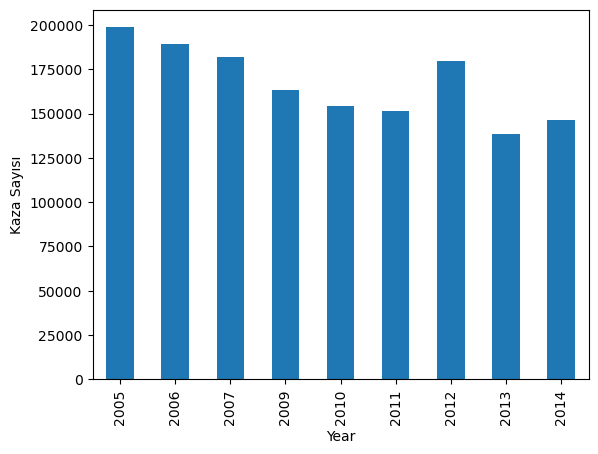

In [14]:
df_accident_counts_by_year=df.groupby("Year").count().Number_of_Vehicles # Yıllara göre kaza sayısı bar grafik
display(df_accident_counts_by_year.plot(kind="bar").set_ylabel("Kaza Sayısı"))

Text(0, 0.5, 'Ölü ve Yaralı Sayısı')

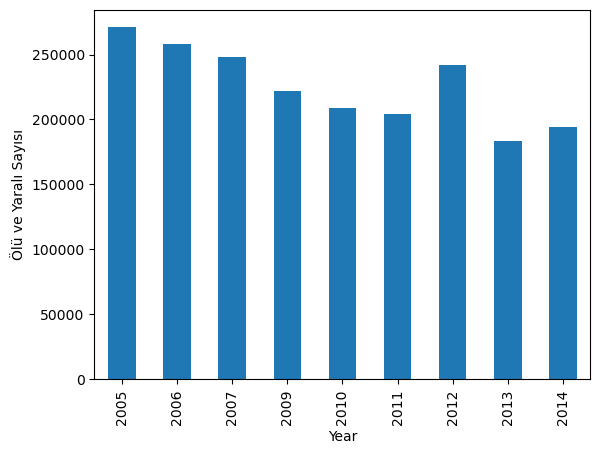

In [15]:
display(df.groupby("Year").Number_of_Casualties.sum().plot(kind="bar").set_ylabel("Ölü ve Yaralı Sayısı"))
#Yıllara Göre Ölü Ve Yaralı Sayısı

In [16]:
def FindAccidentType(Number_of_Vehicles):
    if Number_of_Vehicles==1:
        return "Single-Vehicle Accident"
    if Number_of_Vehicles==2:
        return "Two-Vehicle Accident"
    if Number_of_Vehicles>2:
        return "Multi-Vehicle Accident"

<AxesSubplot:ylabel='Accident_Type'>

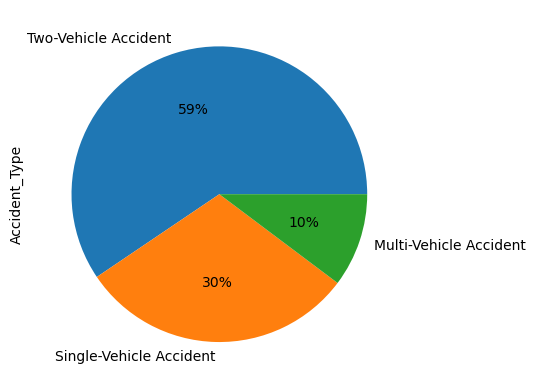

In [17]:
df["Accident_Type"]=df["Number_of_Vehicles"].apply(FindAccidentType) 
df["Accident_Type"].value_counts().plot.pie(autopct='%1.0f%%')
#Single-Vehicle Accident = Tek Aracın Kaza Yapması
#Two-Vehicle Accident = İki aracın kaza yapması(çarpışma ihtimali)
#Multi-Vehicle Accident = Zincirleme kaza ihtimali

In [18]:
df["Road_Surface_Conditions"].unique()

array(['Wet/Damp', 'Dry', 'Frost/Ice', 'Snow', 'Flood', nan], dtype=object)

<AxesSubplot:ylabel='Road_Type'>

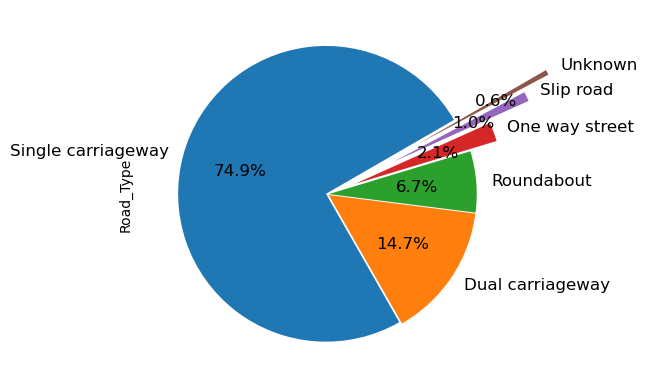

In [19]:
df["Road_Type"].value_counts().plot.pie(startangle = 30,textprops={'size': 'large'},explode=(0.01,0.01,0.01,0.2,0.5,0.7),autopct="%1.1f%%")

<AxesSubplot:ylabel='Road_Surface_Conditions'>

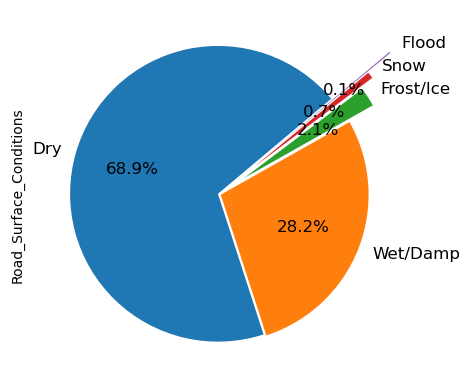

In [20]:
df["Road_Surface_Conditions"].value_counts().plot.pie(startangle = 40,textprops={'size': 'large'},explode=(0.01,0.01,0.2,0.3,0.5),autopct="%1.1f%%")


In [21]:
df

,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Carriageway_Hazards,Year,Accident_Type
0,-0.191170,51.489096,2,1,1,Single carriageway,30,NaN,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,2005,Single-Vehicle Accident
1,-0.211708,51.520075,3,1,1,Dual carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,2005,Single-Vehicle Accident
2,-0.206458,51.525301,3,2,1,Single carriageway,30,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,2005,Two-Vehicle Accident
3,-0.173862,51.482442,3,1,1,Single carriageway,30,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,2005,Single-Vehicle Accident
4,-0.156618,51.495752,3,1,1,Single carriageway,30,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,2005,Single-Vehicle Accident
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,-3.417278,55.264773,2,2,1,Dual carriageway,70,NaN,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,2014,Two-Vehicle Accident
1504146,-3.230255,55.054855,3,2,2,Dual carriageway,70,NaN,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,2014,Two-Vehicle Accident
1504147,-3.230826,54.985668,3,1,1,Single carriageway,40,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,2014,Single-Vehicle Accident
1504148,-3.191397,54.990446,2,3,2,Single carriageway,60,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,2014,Multi-Vehicle Accident


In [22]:
df["Road_Surface_Conditions"].unique()

array(['Wet/Damp', 'Dry', 'Frost/Ice', 'Snow', 'Flood', nan], dtype=object)

In [23]:
df["TotalDamage"]=df["Number_of_Vehicles"]+df["Number_of_Casualties"]
#Bu değer maddi manevi toplam zararı temsil eder

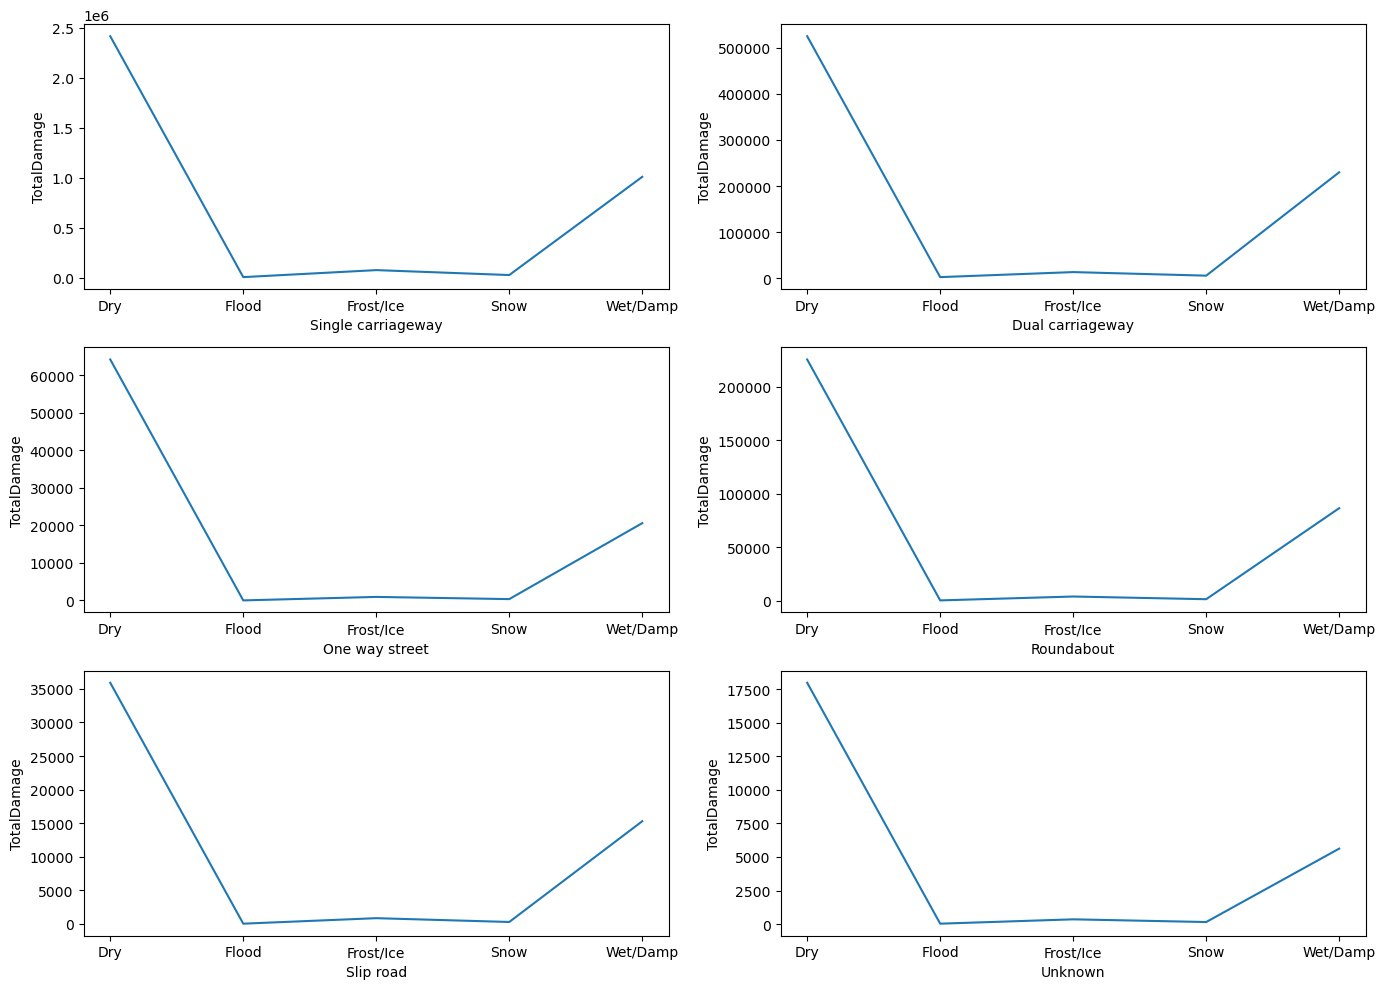

In [24]:
#df[["a","b"]].plot(ax=axes[0], kind='bar')
columns=df["Road_Type"].unique()

fig,axes = plt.subplots(nrows =3, ncols = 2,figsize=(14,10))
for i,axe in enumerate(axes.ravel()):
    
    dfPacked=df[df["Road_Type"]==columns[i]].groupby("Road_Surface_Conditions").TotalDamage.sum()
    
    axe.plot(dfPacked.index,dfPacked.values)
    axe.set_xlabel(columns[i])
    axe.set_ylabel("TotalDamage")
    
fig.tight_layout()

<AxesSubplot:ylabel='Weather_Conditions'>

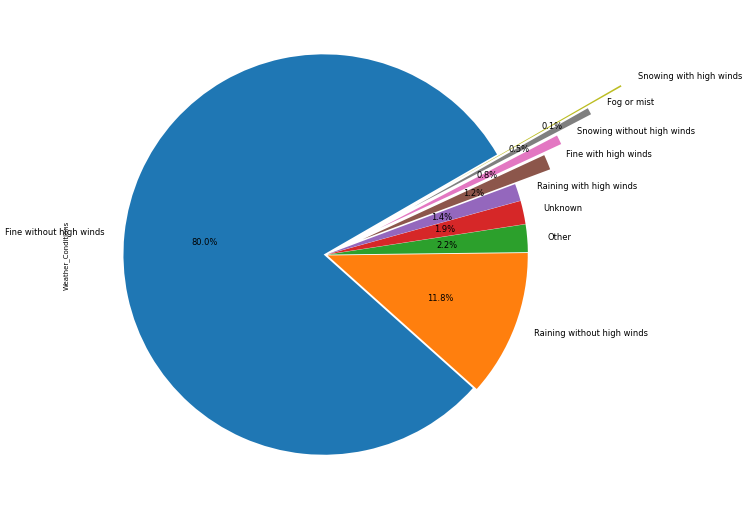

In [25]:
figure(figsize=(13, 13), dpi=50)
df["Weather_Conditions"].value_counts().plot.pie(startangle = 30,textprops={'size': 'large'},explode=(0.01,0.01,0.01,0.01,0.01,0.20,0.3,0.50,0.7),autopct="%1.1f%%")

In [26]:
df["Year"].unique()

array([2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)

In [27]:
df.columns

Index(['Longitude', 'Latitude', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Road_Type', 'Speed_limit', 'Junction_Control',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Carriageway_Hazards',
       'Year', 'Accident_Type', 'TotalDamage'],
      dtype='object')

In [28]:
colrGradient = {0.0: 'blue',
                0.20: 'cyan',
                0.40: 'lime',
                0.60: 'yellow',
                0.80:'orange',
                1.0: 'red'}

In [29]:
year=2014

map_hooray = folium.Map(location=[54.116579, -4.473237],zoom_start = 6,tiles='OpenStreetMap')
    
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
heat_df=df[df['Year']==year]
heat_df=heat_df.dropna(subset = ['Latitude' , 'Longitude','TotalDamage'])
print(len(heat_df.TotalDamage))
oran=0.5
headNumber=int(len(heat_df.TotalDamage)*oran)
print(headNumber)
heat_df = heat_df[['Latitude', 'Longitude','TotalDamage']]
heat_df=heat_df.sort_values(by="TotalDamage",ascending=False).head(headNumber)
heat_data = [[row['Latitude'],row['Longitude'],row['TotalDamage']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, gradient=colrGradient,radius=20).add_to(map_hooray)
display(map_hooray)
map_hooray.save("index.html")

146322
73161
